In [1]:
#Librerias
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('data_ransomware.csv')
df

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


## Preprocesamiento

In [3]:
#Extraccion de datos desconocidos por nulos
df.replace('unknown', np.nan, inplace=True)
#Convertir nulos por "0"
df.fillna(0, inplace=True)
#
df.columns=df.columns.str.strip()
df=df.select_dtypes(exclude=['object'])
df

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


In [4]:
#Seleccion de caracteristicas
X=df.drop(columns=['Benign'])
y=df['Benign']

In [5]:
print("Tipos de datos en X:")
print(X.dtypes)

Tipos de datos en X:
Machine               int64
DebugSize             int64
DebugRVA              int64
MajorImageVersion     int64
MajorOSVersion        int64
ExportRVA             int64
ExportSize            int64
IatVRA                int64
MajorLinkerVersion    int64
MinorLinkerVersion    int64
NumberOfSections      int64
SizeOfStackReserve    int64
DllCharacteristics    int64
ResourceSize          int64
BitcoinAddresses      int64
dtype: object


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
rF=RandomForestClassifier(random_state=42)
rF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
#Indicar como actua el modelo entrenado para detectar, el numero de hoja, en la cual se clasifica el archivo
indice_hojas=rF.apply(X)
print(indice_hojas)

[[337 461 584 ...  91 513 380]
 [772 439 788 ... 619 701 768]
 [337 461 584 ...  91 513 380]
 ...
 [173 196 493 ... 365 137  52]
 [149 122 354 ... 240 279 415]
 [149 122 228 ... 213 320 351]]


In [9]:
y_pred = rF.predict(X_test)
print("Longitud de registros identificados: ",len(y_pred))
print(y_pred)

Longitud de registros identificados:  18746
[0 1 1 ... 0 0 1]


# Metricas de evaluación

In [10]:
#Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
f = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("\t- Exactitud: ",round(accuracy*100, 5),'%')
print("\t- Precisión: ", round(precision*100, 5), '%')
print("\t- Recall: ", round(recall*100, 5), '%')
print("\t- F1 Score: ", round(f*100, 5), '%')

	- Exactitud:  99.57324 %
	- Precisión:  99.54106 %
	- Recall:  99.46703 %
	- F1 Score:  99.50403 %


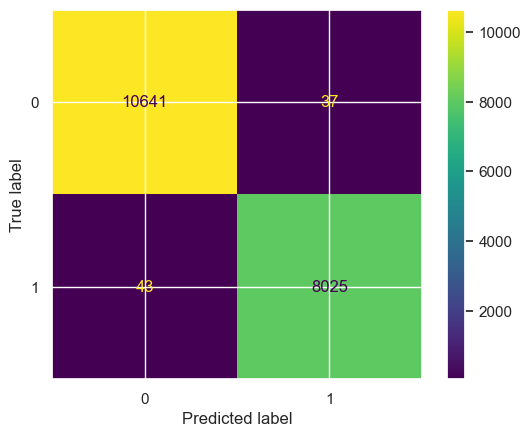

In [11]:
#Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

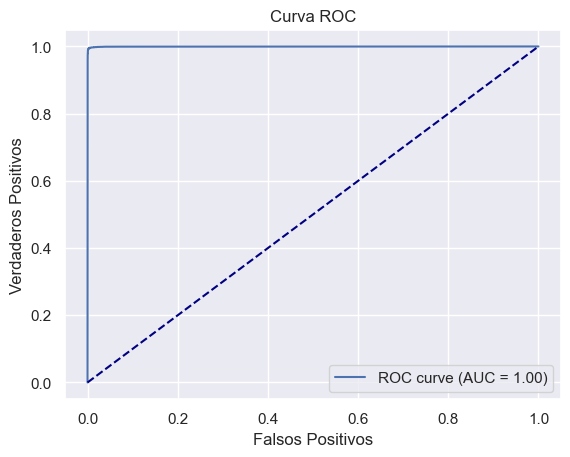

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Predecir probabilidades
y_proba=rF.predict_proba(X_test)[:, 1]

#Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

#Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RSquared: {r2}')

MAE: 0.004267577083111064
MSE: 0.004267577083111064
RSquared: 0.9825922438816789


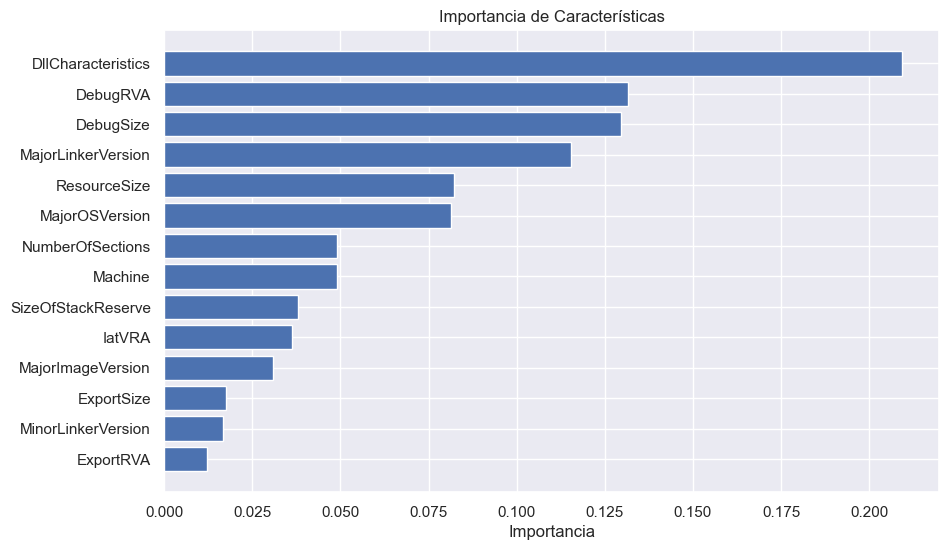

        Característica  Importancia
12  DllCharacteristics     0.209382
2             DebugRVA     0.131622
1            DebugSize     0.129634
8   MajorLinkerVersion     0.115334
13        ResourceSize     0.082151
4       MajorOSVersion     0.081323
10    NumberOfSections     0.049127
0              Machine     0.048929
11  SizeOfStackReserve     0.037990
7               IatVRA     0.036390
3    MajorImageVersion     0.030804
6           ExportSize     0.017620
9   MinorLinkerVersion     0.016800
5            ExportRVA     0.012049


In [16]:
#Obtener la importancia de las características
importancia=rF.feature_importances_[0:14]
nombres_caracteristicas = X_train.columns[0:14]

#Crear un DataFrame para visualización
df_importancia=pd.DataFrame({'Característica': nombres_caracteristicas, 'Importancia': importancia})
df_importancia=df_importancia.sort_values('Importancia', ascending=False)

#Graficar las importancias
plt.figure(figsize=(10,6))
plt.barh(df_importancia['Característica'], df_importancia['Importancia'])
plt.xlabel('Importancia')
plt.title('Importancia de Características')
plt.gca().invert_yaxis()  # Invertir para mostrar la característica más importante arriba
plt.show()
print(df_importancia)

### Presentacion de arboles

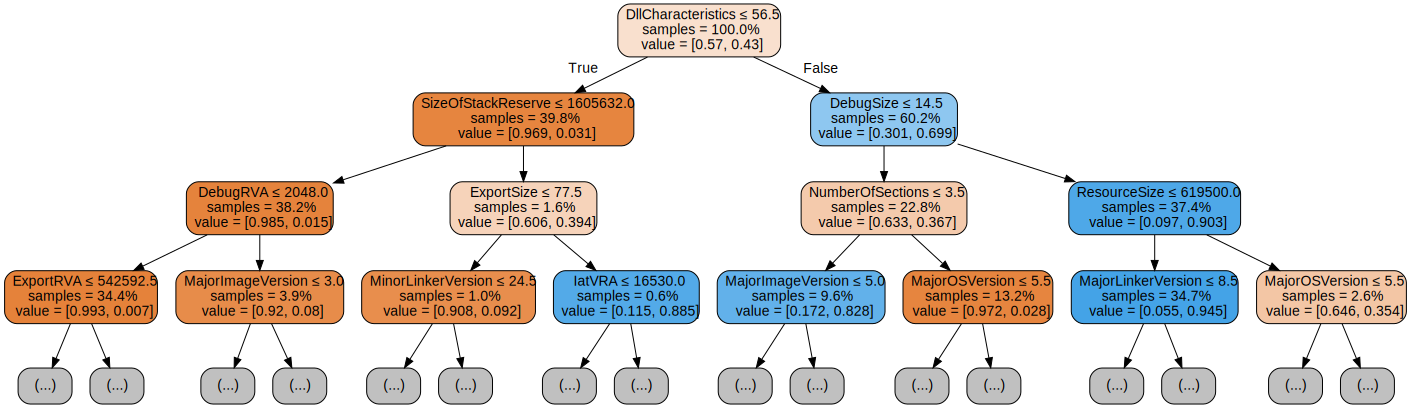

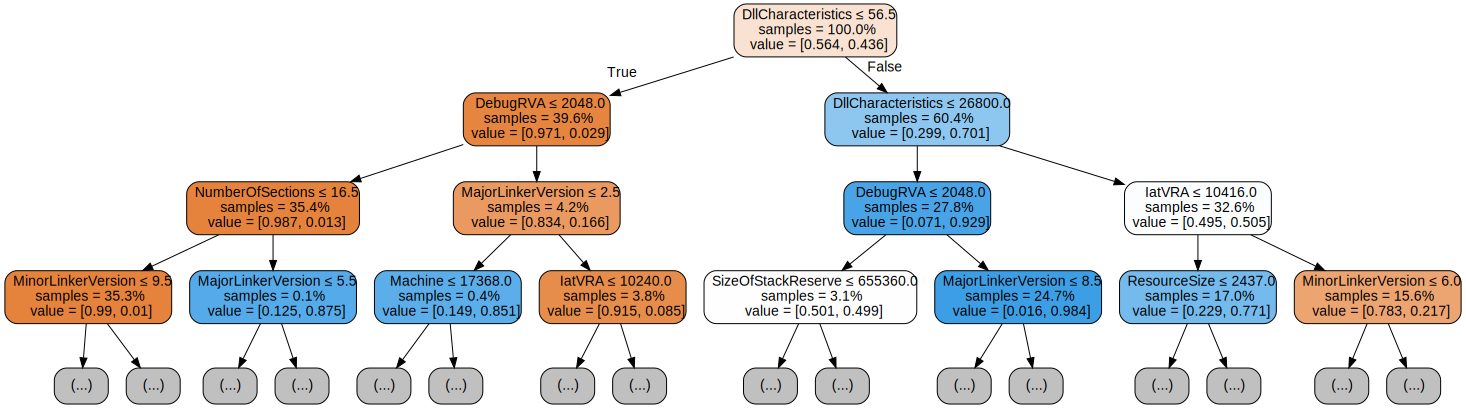

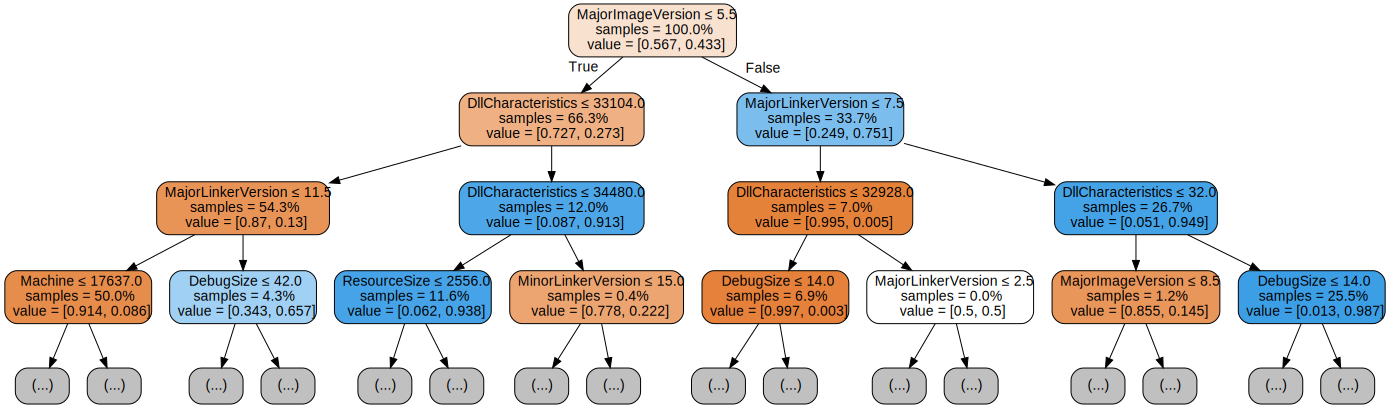

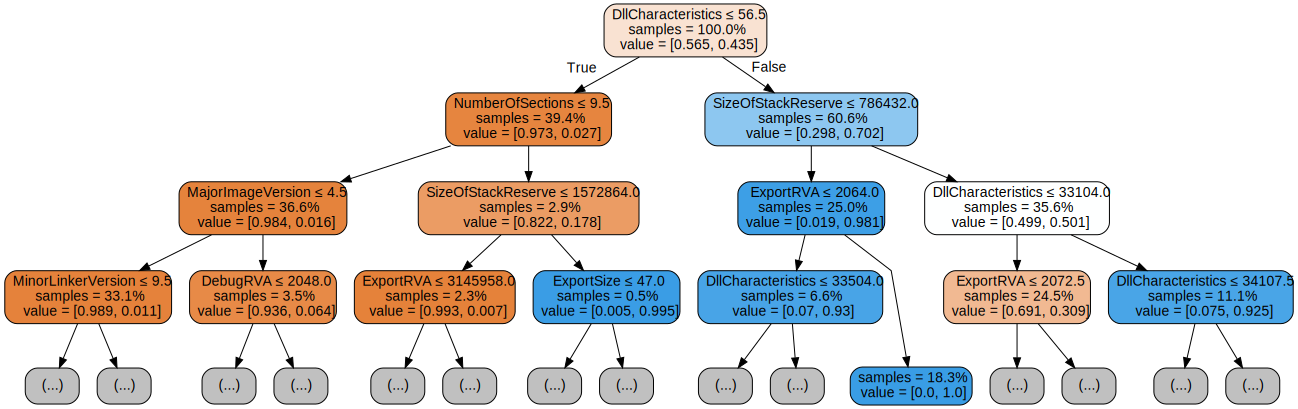

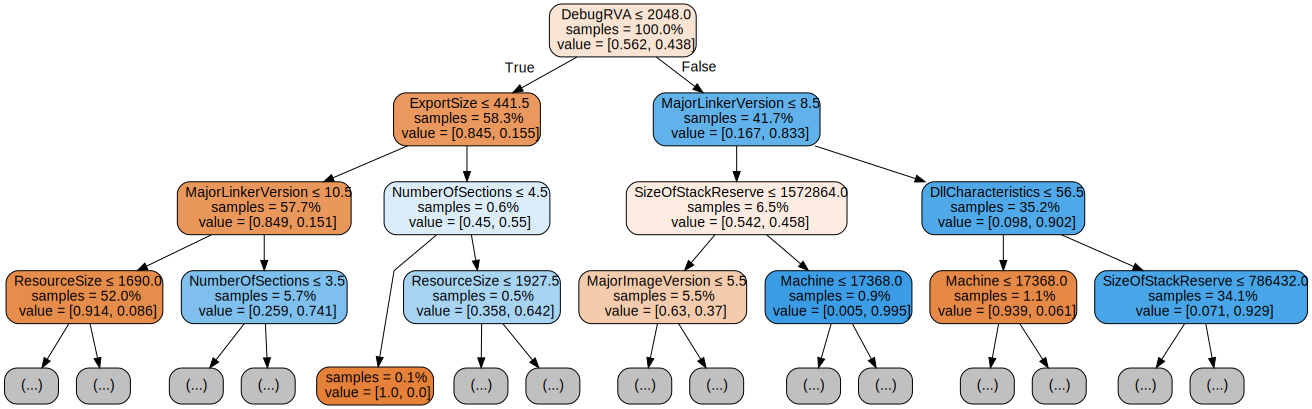

In [15]:
import graphviz
from sklearn.tree import export_graphviz

for i in range(5):
    tree = rF.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True, rounded=True,  
                               max_depth=3, 
                               impurity=False,leaves_parallel=True,fontname="helvetica", special_characters=True,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)